In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
# step 2: data preprocessing
# check for missing values
print("Missing Values: ", df.isnull().sum().sum()) # expecting 0 for clean data

Missing Values:  0


In [5]:
# Separate the feature X (email text) and the target y (spam label).
X = df.drop(columns=['Email No.', 'Prediction'])  # Drop the Email No. and target column
y = df['Prediction']  # Target column for classification (0 = Not Spam, 1 = Spam)

In [6]:
# 3. Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4. K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=3)  # Instantiate KNN with 3 neighbors
knn.fit(X_train, y_train)  # Train the model on the training data
y_pred_knn = knn.predict(X_test)  # Predict on test data

In [8]:

# 5. Support Vector Machine (SVM) Model
svm = SVC(kernel='linear')  # Instantiate SVM with a linear kernel
svm.fit(X_train, y_train)  # Train the model on the training data
y_pred_svm = svm.predict(X_test)  # Predict on test data

In [9]:
# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8685990338164251
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035

KNN Confusion Matrix:
 [[652  87]
 [ 49 247]]


In [10]:
# Evaluate SVM
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



SVM Accuracy: 0.9594202898550724
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

SVM Confusion Matrix:
 [[715  24]
 [ 18 278]]


C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


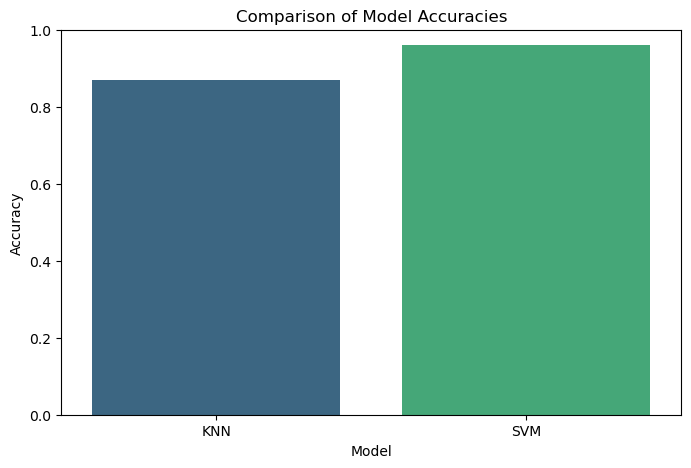

In [11]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt 

# Store the accuracy scores for both models
knn_accuracy = accuracy_score(y_test, y_pred_knn)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

model_names = ['KNN', 'SVM']
accuracies = [knn_accuracy, svm_accuracy]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()